In [26]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
original_df = pd.read_csv('train_set-Copy1.csv')
df = original_df.copy()

In [16]:
df.head()

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
0,10000001,"7,000",< 1 year,Rent,68000.0,not verified,car,18.37,0,NaN,9,14,Female,1
1,10000002,"30,000",4 years,Mortgage,NaN,VERIFIED - income,debt_consolidation,14.93,0,17.0,12,24,Female,3
2,10000003,"24,725",7 years,Mortgage,75566.4,VERIFIED - income source,debt_consolidation,15.88,0,NaN,12,16,Male,3
3,10000004,"16,000",< 1 year,NaN,56160.0,VERIFIED - income source,debt_consolidation,14.34,3,NaN,16,22,Male,3
4,10000005,"17,000",8 years,Own,96000.0,VERIFIED - income source,debt_consolidation,22.17,1,NaN,19,30,Female,1


In [17]:
df.shape

(164309, 14)

In [48]:
def print_stats_summary(data):
    print('Mean : {:.1f}'.format(data.mean()))
    print('Median : {:.1f}'.format(data.median()))
    print('Std : {:.1f}'.format(data.std()))

def sample_with_stats(n):
    sample = population.sample(n)
    print('n : ', n)
    print_stats_summary(sample)

# The Law of Large Numbers

- Theorem : mean of a large number sample is close to the mean of the distributions


In [28]:
# assume that the whole datasets is a population
population = df.Total_Accounts

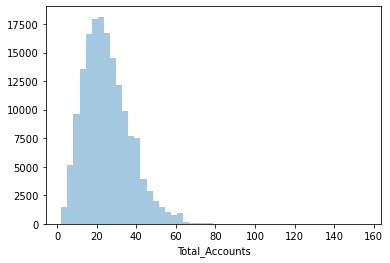

In [31]:
sns.distplot(population,kde = False )

In [47]:
print_stats_summary(population)

Mean : 25.1
Median : 23.0
Std : 11.6


In [49]:
# lets take a sample of 100
sample_with_stats(100)

n :  100
Mean : 24.4
Median : 23.5
Std : 10.7


In [53]:
# take a bigger sample
sample_with_stats(1000)

n :  1000
Mean : 24.8
Median : 24.0
Std : 11.2


In [57]:
result = list()
for i in np.arange(1,100100,100):
    s = population.sample(i)
    mean = s.mean()
    error = population.mean() - mean
    result.append(error)

(-1.0, 1.0)

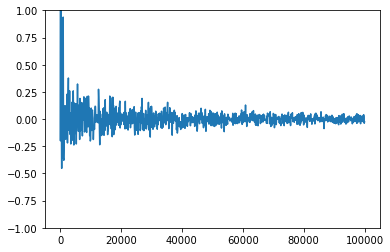

In [63]:
plt.plot(np.arange(1,100100,100), result)
plt.ylim([-1,1])

# The CLI
The central
limit theorem (CLT) says that mean of n = $n^{-1} \sum X_i$ has a distribution which is
approximately Normal with mean μ and variance $\frac{σ^2}{n}$

In [112]:
sample_mean = [population.sample(1000).mean() for i in range(1000)]

(array([  1.,   9.,  46., 126., 238., 280., 179.,  87.,  28.,   6.]),
 array([23.652 , 23.9157, 24.1794, 24.4431, 24.7068, 24.9705, 25.2342,
        25.4979, 25.7616, 26.0253, 26.289 ]),
 <a list of 10 Patch objects>)

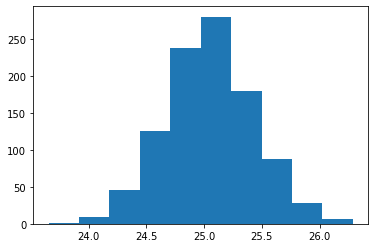

In [113]:
plt.hist(sample_mean)

In [114]:
round(np.mean(sample_mean),1)

25.0

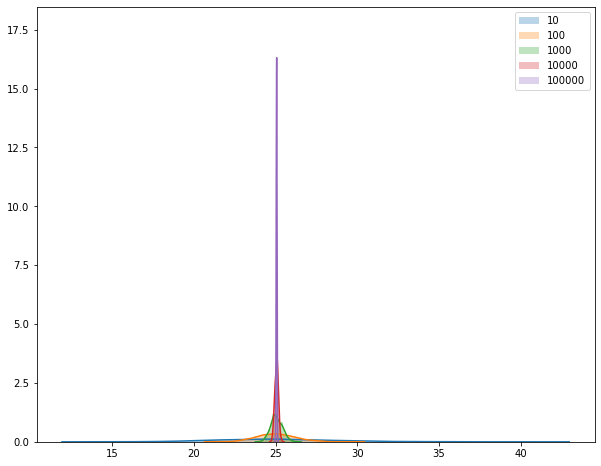

In [118]:
# lets see whether size of sample will affects the distribution or not
fig, ax = plt.subplots(figsize = (10,8))
for val in [10,100,1000,10000,100000]:
    sample_mean = [population.sample(val).mean() for i in range(1000)]
    sns.distplot(sample_mean, label = val, hist_kws={'alpha': 0.3})

plt.legend()